<a href="https://colab.research.google.com/github/gabikohen/sales-predictions/blob/master/Proyecto_1_Parte_5_(Core)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn import set_config
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
set_config(display='diagram')


In [3]:
filename = "/content/drive/MyDrive/Colab Notebooks/Coding dojo/modulo 1 /clase 3/sales_predictions.csv"
df = pd.read_csv(filename)


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
#1) ¿Cuántas filas y columnas? # 8523 rows × 12 columns
df.shape

(8523, 12)

In [11]:
#2) ¿Cuáles son los tipos de datos en cada variable?
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
#3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [13]:
# 3¿Hay duplicados? Si es el caso, eliminen algunos duplicados.
df.duplicated().sum()

0

In [14]:
#4Identifiquen los valores faltantes.

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
# voy a la columna que quiero chequiar

agrupado_tipo = df.groupby("Outlet_Type")["Outlet_Size"].value_counts()
agrupado_tipo

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [16]:
# Veo los valores nullos por cada columna

df.groupby("Item_Identifier")["Item_Weight"].value_counts()



Item_Identifier  Item_Weight
DRA12            11.600         6
DRA24            19.350         5
DRA59            8.270          6
DRB01            7.390          2
DRB13            6.115          5
                               ..
NCZ30            6.590          6
NCZ41            19.850         5
NCZ42            10.500         5
NCZ53            9.600          4
NCZ54            14.650         5
Name: Item_Weight, Length: 1555, dtype: int64

En el paso previo, se presentan valores nulos para cada entrada de "Item_Identifier". Se procederá a crear un diccionario con las claves correspondientes a las columnas de "Item_Identifier", seguido de la sustitución de los valores nulos con los valores deseados. Posteriormente, se empleará el método "fillna" para realizar dicha sustitución.

In [17]:
df["Item_Weight"].fillna(df.groupby(["Item_Identifier"])["Item_Weight"].transform('mean'),inplace=True)


In [18]:
# como son pocos los nulos en Item_Weight los eliminio
df.dropna(subset=['Item_Weight'], inplace=True)

In [19]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
# Utilizo la moda para calcular el grupo definido en outlet size y iloc [0] en caso que haya multiples datos
df['Outlet_Size'].fillna(df.groupby(['Outlet_Type'])['Outlet_Size'].transform(lambda i: i.mode().iloc[0]), inplace=True)

In [21]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
["Item_Identifier"].value_counts()

AttributeError: ignored

In [23]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
print(df.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [25]:
#6) Confirmen que no hay valores faltantes después de abordarlos.
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
outlet_size_counts = df["Outlet_Size"].value_counts()
outlet_size_counts

Small     4797
Medium    2790
High       932
Name: Outlet_Size, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [28]:
# 7) Encuentre y arregle cualquier categoría inconsistente en los datos (ejemplo: arreglar los datos gato, Gato y Gatos de manera que sean consistentes)
#inconsistente  item type
df['Item_Fat_Content'].value_counts()



Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Podemos ver que LF significa Low Fat y reg de regular entoncs vamos a hacer un replace y sumurselo a la columna correspondiente


In [30]:
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'


In [31]:
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [32]:
print("\nValores actualizados:")
print(df['Item_Fat_Content'].value_counts())


Valores actualizados:
Low Fat    5404
Regular    3003
low fat     112
Name: Item_Fat_Content, dtype: int64


In [33]:
#8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Histograma para ver las distribuciones de las diversas características en el conjunto de datos.

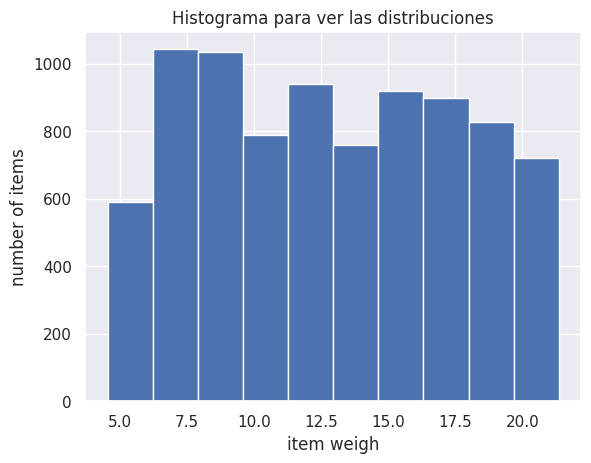

In [34]:
# layout indiq eu debe crear una cuadricula para subgraficos
# figsize permite controlar el tamano de los graficos
#bins controla el numero de intervalos que se utilizan para dividir en un rango
sns.set(style = 'darkgrid')
plt.hist(df["Item_Weight"])
plt.title('Histograma para ver las distribuciones')
plt.xlabel('item weigh')
plt.ylabel('number of items')
plt.show()

Este grafico nos muestra el minimo y maximo del peso de un item , tambien nos muestra cuantos items tienen ese peso

Descrpcion de graficos

Item_weight : Podemos ver que para el eje

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


Boxplot para ver resúmenes estadísticos de diversas características del conjunto de datos.

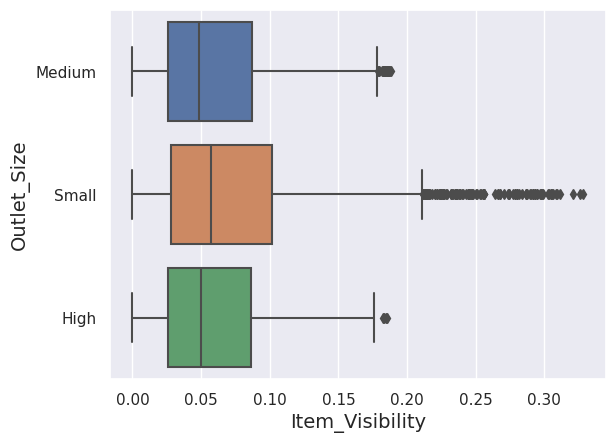

In [36]:
sns.boxplot(x='Item_Visibility', y='Outlet_Size', data=df)
plt.ylabel('Outlet_Size', size=14)
plt.xlabel('Item_Visibility', size=14)
plt.show()

En el gráfico, se observa una prevalencia significativa de valores para "outlet_size" en la categoría "small", seguida por "medium" y, en último lugar, "high". Además, se destaca la visibilidad del producto, siendo más pronunciada en la categoría "small" en comparación con las demás. En particular, se nota que la visibilidad de productos con tamaño "small" es mayor o igual a 0.20 en varios casos, mientras que la categoría "high" presenta únicamente dos instancias con valores de visibilidad, ambos en el rango de 0.18. En cuanto a "medium", se registran algunos casos con valores de visibilidad comprendidos entre 0.16 y 0.18. Estos patrones proporcionan información valiosa sobre la distribución y visibilidad de productos en relación con el tamaño del punto de venta.

<ipython-input-37-bb5be9827a8b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

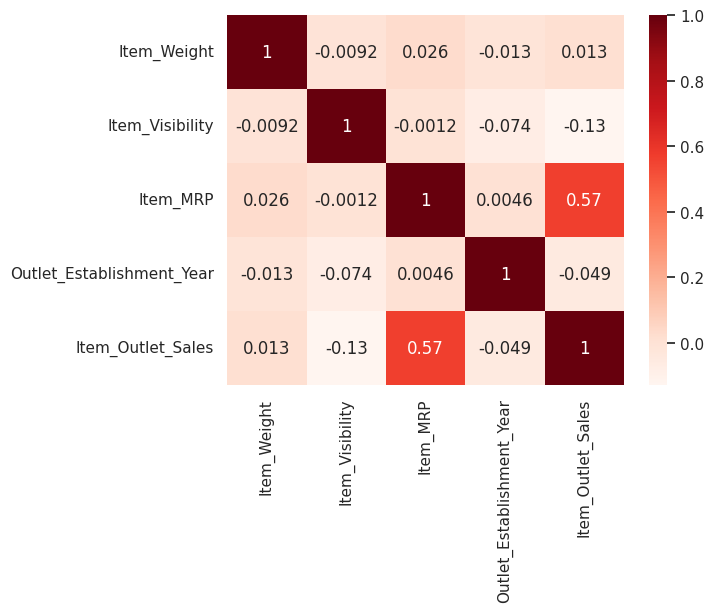

In [37]:
#Mapa de calor de correlación entre las características.
corr = df.corr()
sns.heatmap(corr, cmap = 'Reds', annot = True)


En el análisis de datos, observamos un patrón distintivo en la representación gráfica, donde los tonos más oscuros indican niveles más elevados de calor, el color naranja denota niveles moderados y se identifican dos categorías de tonos más claros, especialmente cercanos a cero, que representan temperaturas frías.

El conjunto de datos revela la presencia de 4 instancias de altas temperaturas (bordo), 2 instancias de temperaturas moderadas (naranja), 10 instancias de temperaturas frías y 6 instancias de temperaturas semi frías. Este análisis visual aporta una comprensión rápida de la distribución de temperaturas en el conjunto de datos, destacando las diferentes categorías de temperaturas en función de la intensidad de color en la representación gráfica.

Continuaremos trabajando en el proyecto de predicción de ventas.  es ayudar a un comerciante a comprender tanto las propiedades de los productos así como los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.​
Para la cuarta parte, la tarea es crear numerosas visualizaciones de datos para ayudar a las partes interesadas a comprender mejor las tendencias de los datos. No duden en ser creativos esta semana. Esta es su oportunidad para distinguir sus proyectos de otros con diferentes visualizaciones y análisis.
• Reutilicen su limpieza, exploraciones y análisis anteriores.
• Creen un mínimo de dos visualizaciones de datos para ayudar a otros a comprender las tendencias en los datos (análisis de datos explicativos).
• Puesto que estos gráficos son para la elaboración de informes, asegúrense de que tengan un buen aspecto incluyendo títulos, leyendas, etc.
Suban su trabajo a GitHub.
¡Entreguen un enlace a su repositorio de GitHub! Continuaremos trabajando en el proyecto un poco cada semana.

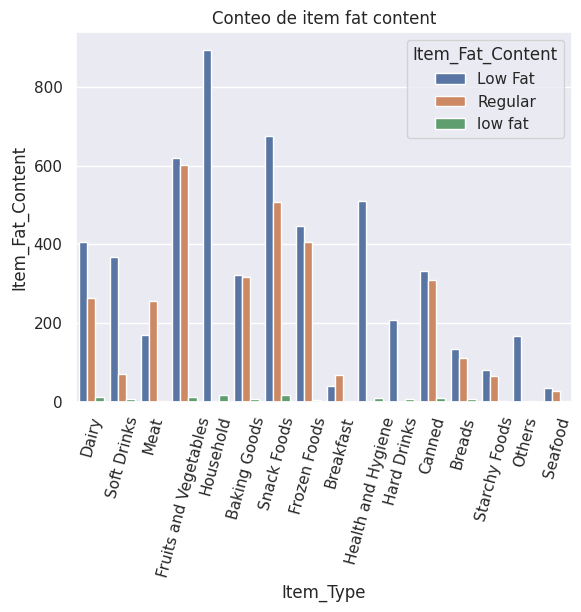

In [38]:
sns.countplot(x='Item_Type', hue='Item_Fat_Content', data=df)
plt.title('Conteo de item fat content')
plt.xlabel('Item_Type')
plt.ylabel('Item_Fat_Content')
plt.xticks(rotation=75)
plt.show()


el gráfico de barras muestra cómo se distribuye el contenido de grasa de los ítems en diferentes categorías de ítems. Cada barra en el gráfico representa un tipo de ítem, y los colores dentro de cada barra indican la distribución del contenido de grasa para ese tipo de ítem.

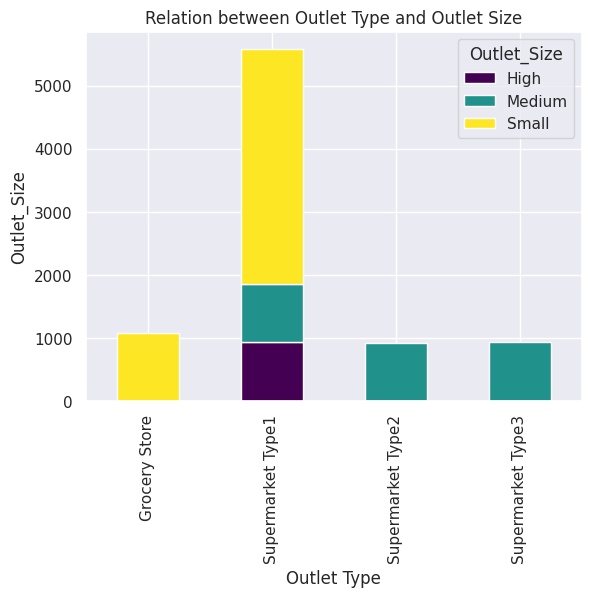

In [39]:
cross_tab = pd.crosstab(df['Outlet_Type'], df['Outlet_Size'])
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Outlet Type')
plt.ylabel('Outlet_Size')
plt.title('Relation between Outlet Type and Outlet Size')
plt.show()

El gráfico de barras apiladas revela la relación entre tipos de tiendas ('Outlet_Type') y tamaños de tiendas ('Outlet_Size'). Muestra la distribución visual de tamaños para cada tipo de tienda, destacando patrones y variaciones. Las proporciones relativas dentro de cada barra facilitan la comparación entre tipos de tiendas, revelando preferencias o características distintivas. La identificación de tendencias o patrones en los tamaños de las tiendas dentro de cada tipo es esencial, ofreciendo información valiosa para decisiones estratégicas y comprensión del comportamiento del mercado. Este análisis visual proporciona insights clave para la gestión eficaz de establecimientos comerciales.

Continuaremos trabajando en el proyecto de la predicciones de ventas. El objetivo de esta etapa es ayudar al distribuidor usando aprendizaje automático a hacer predicciones sobre futuras ventas basándose en los datos proporcionados.

Para la parte 5, regresarán al conjunto de datos original con el objetivo de evitar una fuga de datos.  

Nota: Si imputaron los valores faltantes basados en un cálculo en todo el conjunto de datos (como la media), ahora deben realizar ese paso después de hacer train test split usando SimpleImputer.  



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


Identifiquen las características (X) y el objetivo (y): Asignen la columna "Item_Outlet_Sales" como el objetivo y el resto de las variables relevantes como la matriz de características.  

In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
# dividan la característica y el objetivo y realicen un train/test split.
X = df.drop(columns=['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']


Realicen un train test split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Nominales :  Item_Identifier , Item_Fat_Content , Item_Type,	Outlet_Identifier,Outlet_Type,Outlet_Location_Type
Ordinales :  Outlet_Size
Numericas :  Item_Weight	, Item_Visibility , Item_MRP, Outlet_Establishment_Year

Para los ordinales voy usar replace para convertirlos en numericos

In [44]:
df['Outlet_Size'].value_counts()

Small     4797
Medium    2790
High       932
Name: Outlet_Size, dtype: int64

In [45]:
df['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2}, inplace=True)
df['Outlet_Size'].value_counts()

0    4797
1    2790
2     932
Name: Outlet_Size, dtype: int64

In [47]:
# Utilizar transformadores de columnas:select
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')


# Utilizar transformadores de columnas:
scaler = StandardScaler() # sirve para estandarizar y tiene una media de 0 y 1
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [48]:
# Imputar algún valor faltante. Utilizar la estrategia “mean” para las columnas numéricas y la estrategia “most_frequent” para las columnas categóricas.
# SimpleImputer sirve para manejar los valores faltantes
mean_imp = SimpleImputer(strategy = 'mean')
freq_imp = SimpleImputer(strategy = 'most_frequent')

# Utilizar pipelines
num_pipeline = make_pipeline(mean_imp, scaler) # make_pipeline Esto facilita la reproducción y el mantenimiento
cat_pipeline = make_pipeline(freq_imp, ohe)


In [49]:
# Hacer tuplas
num_tuple = (num_pipeline, num_selector)
cat_tuple = (cat_pipeline, cat_selector)

# APLICAR
preprocesamiento = make_column_transformer(num_tuple, cat_tuple)

In [50]:
 #Todos los datos de preprocesamiento deben estar contenidos en un único objeto de preprocesamiento.
preprocesamiento.fit(X_train)

# APLICAR
X_train_processed = preprocesamiento.transform(X_train)
X_test_processed = preprocesamiento.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [51]:
# evitar la fuga de datos para dejarlos listos para el modelado.
print('Hay',  np.isnan(X_train_processed).sum().sum(), 'datos que faltan en el training.')
print('Hay', np.isnan(X_test_processed).sum().sum(), 'datos que faltan en el set.')


Hay 0 datos que faltan en el training.
Hay 0 datos que faltan en el set.
